<b> MIS 382N: ADVANCED MACHINE LEARNING<b>

Assignment 5

Total points: 55

Due:  to be submitted via Canvas by 11:59 pm, Mon Nov 21st.

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

**Additionally, upload any images you plan to incorporate in your notebook as attachments so we can see them in case the uploaded images don't appear properly on our end.**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Muskaan Singhania

EID: ms88283

Name: Apurva Audi

EID: aa85254

# Question 1: Ensemble Methods [10 pts]
Read this [article](https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db) on different boosting methods. Briefly describe the main advantages and disadvantages of  CatBoost as compared to XGBoost.

**CatBoost** as the name suggests works well with **categorical data**. **No encoding** of categorical variables is required in CatBoost, whereas in order to run XGBoost on categorical data - categorical data would need to be encoded. Moreover, CatBoost is **more efficient** than XGBoost when it comes to CPU implementation because it builds **balanced trees**. Due to the aforementioned feature of CatBoost, it takes **less time to predict** and **doesn’t overfit** the training dataset as much. Another reason why it gets past the overfitting issue is that it uses **ordered boosting**. In addition to all this, it has an **overfitting detector**. A **lot less pre-processing** is required while using CatBoost in comparison to XGBoost. Lastly, it can **handle missing values** elegantly 

**XGBoost** has **more generalization capabilities** as compared to CatBoost. We have discussed how CatBoost performs well with categorical data, but it does so only if the data has been tuned properly. CatBoost by default would treat all columns as numerical **if the indices are not passed correctly**, so one has to be mindful of this while initializing the model. Lastly, XGBoost is **more interpretable** than CatBoost as it is way more transparent in terms of visualizing trees. 

# Question 2 : Ensemble Methods for Classification [25 pts]

We look at the following dataset [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) for this question. The dataset is extremely large so for this question we only consider a subset of the data which has been provided along with the notebook for this assignment.
The task is to predict the probability that someone will experience financial distress in the next two years. The dataset has already been split into train and test sets.

In [1]:
import pandas as pd

data = pd.read_csv('hw5_data.csv')
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.571373,66,0,0.430620,9274.0,10,0,1,0,0.0
1,0,0.233999,56,0,0.257380,5656.0,12,0,0,0,0.0
2,0,0.299270,33,0,0.114575,4747.0,8,0,0,0,3.0
3,0,0.032165,41,0,0.308326,8490.0,8,0,1,0,0.0
4,0,0.050591,36,0,0.862627,3333.0,8,0,2,0,0.0


In [2]:
from sklearn.model_selection import train_test_split
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

print('train',X_train.shape,y_train.shape)
print('test',X_test.shape,y_test.shape)

train (3750, 10) (3750,)
test (1250, 10) (1250,)


In this question, we will compare performance of different ensemble methods for classification problems: [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html), [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) Classifiers.

a) **[2.5 pts]** Use a Decision Tree Classifier with random_state = 14 for the classification problem. Report the accuracy_score and roc_auc_score on the test data for the classifier.

b) **[2.5 pts]** Create an ensemble of 25 classifiers (i.e n_estimators = 25) with random_state = 14 for [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) with base classifier as Decision Tree Classifier from part a). Report accuracy_score and roc_auc_score on the test data for the Bagging classifiers. 

c) **[5 pts]** Use the training data and build a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model for the classification problem. Find the best parameters (including *n_estimators*, *max_features* and *criterion*) using [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Report the optimal parameters obtained by GridSearch. Report the confusion matrix  and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on test data using the model fit with best parameters.

d) **[5 pts]** Use [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for this problem. Again, find the best parameters (including *n_estimators, learning_rate*), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data.

e) **[5 pts]** Use [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) for this problem. Again, find the best parameters (including *n_estimators, learning_rate*), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data.

f) **[5 pts]** Compare the performance of decision tree from part a) with the ensemble methods, Briefly explain which of the three ensemble method performed better and why?

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from time import time
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
columns_list = list(X.columns)

In [5]:
model_scores = dict()
scores = pd.DataFrame(columns=['model','accuracy','roc_auc_score'])

In [6]:
dt_mod = DecisionTreeClassifier(random_state = 14)
dt_fit = dt_mod.fit(X_train, y_train)
dt_pred = dt_mod.predict(X_test)
dt_pred_probs = dt_fit.predict_proba(X_test)[:,1]
print('Accuracy score of the Decision Tree Classifer is:',accuracy_score(y_test, dt_pred))
print('ROC AUC Score of the Decision Tree Classifier is:',roc_auc_score(y_test, dt_pred_probs))
model_scores['model'] = 'decision_tree'
model_scores['accuracy'] = accuracy_score(y_test, dt_pred) 
model_scores['roc_auc_score'] = roc_auc_score(y_test, dt_pred_probs)
scores = scores.append(model_scores, ignore_index=True)

Accuracy score of the Decision Tree Classifer is: 0.888
ROC AUC Score of the Decision Tree Classifier is: 0.5854582176218127


In [7]:
bag_mod = BaggingClassifier(DecisionTreeClassifier(random_state = 14), n_estimators=25, random_state = 14)
bag_fit = bag_mod.fit(X_train, y_train)
bag_pred = bag_mod.predict(X_test)
bag_pred_probs = bag_fit.predict_proba(X_test)[:,1]
print('Accuracy score of the Decision Tree Classifer after bagging is: ',accuracy_score(y_test, bag_pred))
print('ROC AUC Score of the Decision Tree Classifier after bagging is:',roc_auc_score(y_test, bag_pred_probs))
model_scores['model'] = 'bagging'
model_scores['accuracy'] = accuracy_score(y_test, bag_pred) 
model_scores['roc_auc_score'] = roc_auc_score(y_test, bag_pred_probs)
scores = scores.append(model_scores, ignore_index=True)

Accuracy score of the Decision Tree Classifer after bagging is:  0.9256
ROC AUC Score of the Decision Tree Classifier after bagging is: 0.7857106791214341


In [8]:
# Part c)
clf = RandomForestClassifier()

param_grid = {"n_estimators": [1, 10, 50, 100],
              "max_features": [1, 5, 10, "auto"],
              "criterion": ['gini','entropy'],
              "random_state": [17]}

# Grid search
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid)
optimal_fit = grid_search.fit(X_train, y_train)
optimal_pred = optimal_fit.predict(X_test)
optimal_pred_prob = optimal_fit.predict_proba(X_test)[:,1]
print('Chosen Hyperparameters after optimization:', optimal_fit.best_params_)
print('Confusion Matrix\n', confusion_matrix(y_test, optimal_pred))
print('ROC AUC score after grid search is',roc_auc_score(y_test, optimal_pred_prob))
model_scores['model'] = 'random_forest'
model_scores['accuracy'] = accuracy_score(y_test, optimal_pred) 
model_scores['roc_auc_score'] = roc_auc_score(y_test, optimal_pred_prob)
scores = scores.append(model_scores, ignore_index=True)

Chosen Hyperparameters after optimization: {'criterion': 'entropy', 'max_features': 1, 'n_estimators': 100, 'random_state': 17}
Confusion Matrix
 [[1162    3]
 [  82    3]]
ROC AUC score after grid search is 0.8375612219136582


In [9]:
# Part d)

clf = AdaBoostClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid)
optimal_fit = grid_search.fit(X_train, y_train)
optimal_pred = optimal_fit.predict(X_test)
optimal_pred_prob = optimal_fit.predict_proba(X_test)[:,1]
print('Chosen Hyperparameters after optimization:', optimal_fit.best_params_)
print('Confusion Matrix\n', confusion_matrix(y_test, optimal_pred))
print('ROC AUC score after grid search is',roc_auc_score(y_test, optimal_pred_prob))
model_scores['model'] = 'ada_boost'
model_scores['accuracy'] = accuracy_score(y_test, optimal_pred) 
model_scores['roc_auc_score'] = roc_auc_score(y_test, optimal_pred_prob)
scores = scores.append(model_scores, ignore_index=True)

Chosen Hyperparameters after optimization: {'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}
Confusion Matrix
 [[1153   12]
 [  72   13]]
ROC AUC score after grid search is 0.8390254986114618


In [10]:
# Part e)

clf = GradientBoostingClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }
# Grid search
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid)
optimal_fit = grid_search.fit(X_train, y_train)
optimal_pred = optimal_fit.predict(X_test)
optimal_pred_prob = optimal_fit.predict_proba(X_test)[:,1]
print('Chosen Hyperparameters after optimization:', optimal_fit.best_params_)
print('Confusion Matrix\n', confusion_matrix(y_test, optimal_pred))
print('ROC AUC score after grid search is',roc_auc_score(y_test, optimal_pred_prob))
model_scores['model'] = 'gradient_boosting'
model_scores['accuracy'] = accuracy_score(y_test, optimal_pred) 
model_scores['roc_auc_score'] = roc_auc_score(y_test, optimal_pred_prob)
scores = scores.append(model_scores, ignore_index=True)

Chosen Hyperparameters after optimization: {'learning_rate': 0.1, 'n_estimators': 10, 'random_state': 17}
Confusion Matrix
 [[1164    1]
 [  84    1]]
ROC AUC score after grid search is 0.8366372128250441


In [11]:
# Part f)
scores 

,model,accuracy,roc_auc_score
0,decision_tree,0.888,0.585458
1,bagging,0.9256,0.785711
2,random_forest,0.932,0.837561
3,ada_boost,0.9328,0.839025
4,gradient_boosting,0.932,0.836637


Right off the bat after looking at the scores, we could say **Adaboost** is **best performing ensemble method** on this data from accuracy and the roc_auc_score. One other thing that stood out to us, is that **Decision Tree** is not performing as well as the ensemble methods. **Ensemble methods** perform better better than Decision tree and the underlying reason for this could be **class imbalance**

## Question 3: XGBoost on Datasets with varying Class Imbalance [15 points]

You are given three datasets (all extracted from the [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) dataset which was used in the last question). They have varying levels of class imbalance (positive to negative class ratio):
1. dataset_equally_biased_final has a class ratio of 1:1
2. dataset_originally_biased_final has a class ratio of 1:15
3. dataset_highly_biased_final has a class ratio of 1:39

Use [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html) on these three datasets and plot the [calibration curves](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html#sklearn.calibration.calibration_curve) for your predictions. Examine both uniform and quantile binning strategies for your plots and observe how the plots look. For which of the datasets is you model calibrated the best? Which of the binning strategies provide more informative visualization for each of the datasets?

In [12]:
from sklearn.model_selection import train_test_split
import pandas as pd

dataset = pd.read_csv("data_equally_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Balanced Dataset")
# Number of classes in training Data
print(y_train1.value_counts())
# Number of classes in test Data
print(y_test1.value_counts())

dataset = pd.read_csv("data_originally_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Originally Imbalanced Dataset")
# Number of classes in training Data
print(y_train2.value_counts())
# Number of classes in test Data
print(y_test2.value_counts())

dataset = pd.read_csv("data_highly_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Highly Imbalanced Dataset")
# Number of classes in training Data
print(y_train3.value_counts())
# Number of classes in test Data
print(y_test3.value_counts())

Balanced Dataset
0    4000
1    4000
Name: SeriousDlqin2yrs, dtype: int64
0    1000
1    1000
Name: SeriousDlqin2yrs, dtype: int64
Originally Imbalanced Dataset
0    7466
1     534
Name: SeriousDlqin2yrs, dtype: int64
0    1866
1     134
Name: SeriousDlqin2yrs, dtype: int64
Highly Imbalanced Dataset
0    7800
1     200
Name: SeriousDlqin2yrs, dtype: int64
0    1950
1      50
Name: SeriousDlqin2yrs, dtype: int64


In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from time import time
import xgboost

%matplotlib inline

In [14]:
# Using the earlier dataset and applying XGBoost on it

clf = xgboost.XGBClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)

# Balanced Dataset
print("Balanced Dataset")
grid_search.fit(X_train1, y_train1)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train1, y_train1)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt1 = clf.predict(X_test1)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test1, y_pred_gbt1))

y_pred_proba1 = clf.predict_proba(X_test1)[:,1]

acc_score = accuracy_score(y_test1,y_pred_gbt1)
auc_score = roc_auc_score(y_test1,y_pred_proba1)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))


# Originally Imbalanced Dataset

print("Originally Imbalanced Dataset")
grid_search.fit(X_train2, y_train2)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train2, y_train2)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt2 = clf.predict(X_test2)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test2, y_pred_gbt2))

y_pred_proba2 = clf.predict_proba(X_test2)[:,1]

acc_score = accuracy_score(y_test2,y_pred_gbt2)
auc_score = roc_auc_score(y_test2,y_pred_proba2)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))

# Highly Imalanced Dataset

print("Highly Imbalanced Dataset")
grid_search.fit(X_train3, y_train3)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train3, y_train3)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt3 = clf.predict(X_test3)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test3, y_pred_gbt3))

y_pred_proba3 = clf.predict_proba(X_test3)[:,1]

acc_score = accuracy_score(y_test3,y_pred_gbt3)
auc_score = roc_auc_score(y_test3,y_pred_proba3)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))

Balanced Dataset
{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}
training time 1.176 s
predict time 0.007 s
XGBoost conf matrix: 
[[794 206]
 [228 772]]
Accuracy: 0.783
 AUC_ROC: 0.856863

Originally Imbalanced Dataset
{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}
training time 1.223 s
predict time 0.007 s
XGBoost conf matrix: 
[[1843   23]
 [ 114   20]]
Accuracy: 0.9315
 AUC_ROC: 0.8342691686263217

Highly Imbalanced Dataset
{'learning_rate': 0.01, 'n_estimators': 100, 'random_state': 17}
training time 1.119 s
predict time 0.007 s
XGBoost conf matrix: 
[[1945    5]
 [  50    0]]
Accuracy: 0.9725
 AUC_ROC: 0.8398564102564102



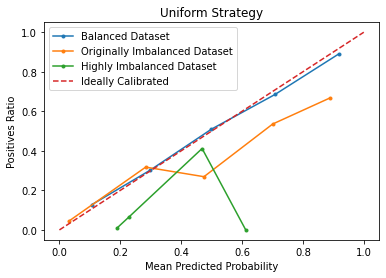

In [15]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

#Plot all calibration curves for strategy = 'uniform' (It is uniform by default)
#Balanced Dataset
prob_true_1, prob_pred_1 = calibration_curve(y_test1, y_pred_proba1, strategy='uniform')
#Originally Imbalanced Dataset
prob_true_2, prob_pred_2 = calibration_curve(y_test2, y_pred_proba2, strategy='uniform')
#Highly Imbalanced Dataset
prob_true_3, prob_pred_3 = calibration_curve(y_test3, y_pred_proba3, strategy='uniform')
plt.plot(prob_pred_1, prob_true_1, marker = '.', label = 'Balanced Dataset')
plt.plot(prob_pred_2, prob_true_2, marker = '.', label = 'Originally Imbalanced Dataset')
plt.plot(prob_pred_3, prob_true_3, marker = '.', label = 'Highly Imbalanced Dataset')
#Perfect calibration
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')
leg = plt.legend(loc = 'upper left')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Positives Ratio')
plt.title('Uniform Strategy')
plt.show()

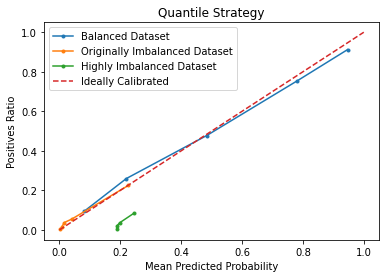

In [16]:
#Plot all calibration curves for strategy = 'quantile'
#Balanced Dataset
prob_true_1, prob_pred_1 = calibration_curve(y_test1, y_pred_proba1, strategy='quantile')

#Originally Imbalanced Dataset
prob_true_2, prob_pred_2 = calibration_curve(y_test2, y_pred_proba2, strategy='quantile')

#Highly Imbalanced Dataset
prob_true_3, prob_pred_3 = calibration_curve(y_test3, y_pred_proba3, strategy='quantile')
plt.plot(prob_pred_1, prob_true_1, marker = '.', label = 'Balanced Dataset')
plt.plot(prob_pred_2, prob_true_2, marker = '.', label = 'Originally Imbalanced Dataset')
plt.plot(prob_pred_3, prob_true_3, marker = '.', label = 'Highly Imbalanced Dataset')
#Perfect calibration
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')

leg = plt.legend(loc = 'upper left')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Positives Ratio')
plt.title('Quantile Strategy')
plt.show()

To answer the first prompt, we perused the graphs and noticed that the balanced dataset model line is the closet to ideally calibrated model. Hence, we can conclude that **XGBoost on the balanced dataset** seems to be the **best calibrated model**. 

Coming to the binning strategies, **quantile strategy** seems to be giving a better representation of the probability distribution. This is especially true for **imbalanced datasets** due to the reason that each bin gets equal number of samples. Hence we can conclude that more often than not, the quantile strategy is **more informative** than the uniform strategy. To elaborate this further, **uniform strategy** would lead to uneven distribution of samples depending on the **mean predicted probability**. It is worth mentioning that, when it comes to **balanced datasets**, **uniform binning** is **more interpretable**

#Question 4: Deep Learning Mechanisms [5 points]

Briefly explain the motivation behind the following mechanisms commonly used in deep learning: <br>
a) **[2.5 pts]** Skip connections <br>
b) **[2.5 pts]** Batch normalization

#Answer:

**(a)** Before we get into skip connections, let’s take a step back and review backpropagation. Back propagation is gradually trying minimize loss by updating the parameters of the network. Since it uses chain-rule to calculate the gradient, as we go back to earlier layers, the gradient keeps getting smaller and smaller and in some cases 0. We don’t end updating the weights of the earlier layers in the cases it becomes 0. The issue described earlier is commonly known as the **vanishing gradient** problem and in order to address it, we could utilize skip connections 

At a high level, what skip connections does is, as it is clear from the name, skip some layers in the network. Basically, it provides an alternative path for the gradient. This helps skip connections achieve a **much smoother loss surface resulting in faster model convergence**. 

Digging deeper, there are two ways we could use skip connections 

1. **ResNet** (skip connections via addition): back-propagating through the identity function by using vector addition and this way the gradient is preserved 
2. **DenseNet** (skip connections via concatenation): concatenation of feature maps to ensure maximum information flow between layers. Hence features could essentially be reused from from the earlier layers 

In conclusion, skip connections ensure uninterrupted gradient flow from the first to last layer and feature reusability 

-----------------------------

**(b)** Understanding Normalization first, compressing a spread out range of numbers to a fixed range. Using this method, our inputs are normalized, so that **all model parameters have a level playing field** which helps in **faster model convergence**. 

Now in Deep Neural networks, as different mini-batches of data are passed through the network, the **input distribution keep changing**. Turns out by applying this concept of normalization  and normalizing each layer based on batch / mini-batch statistics helps the model converge faster by **avoiding unstable gradients**. (Exploding and vanishing gradients could arise when the parameters are in different scales) 